# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [ ]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [2]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [3]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


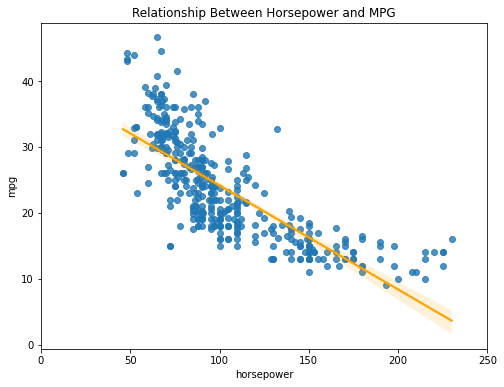

In [4]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [ ]:
# call_on_students(1)

#### Answer: 

- This is the cost curve, showing the RSS for different slopes. RSS is the measure of discrepency between the data and the estimation model. This tells us that when the slope is between -.158 and -.157, the RSS is the lowest. This technique of optimizing towards a minimum value is called gradient descent.


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [ ]:
# call_on_students(1)

#### Answer: 

- 


### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [ ]:
# call_on_students(1)

#### Answer: 

- It relates to the steps we take down our cost curve to get closer and closer to our lowest RSS. The learning rate is a fraction that we multiply to our current slope. We do this to avoid overshooting the minimum.


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [ ]:
# call_on_students(1)

#### Answer: 

- Used for classification problems, can predict the category of something given multiple features
- the probability of our input belonging to the class labeled with 1
- Logistic regression handles classification problems, and Linear handles regression problems (output is a continious variable
- Parametric, fixed number of parameters. Does not change depending on training data

Pros
- quick to train (fit)
- not prone to overfitting (built in regularization)
- more interpretable (transparent)

Cons
- doesn't handle class imbalance very well
- not robust too outliers

### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [ ]:
# call_on_students(1)

#### Answer: 

- Logistic Regression vs KNN (probability vs distanced based)
- Logistic Regression is faster, less computationally expensive
- KNN 


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [5]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [6]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [ ]:
# call_on_students(1)

In [11]:
# Train-test split
X = mpg_class.drop('target', axis=1)
y = mpg_class['target']
# Set test_size=0.33 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [8]:
# call_on_students(1)
mpg_class['target'].value_counts(normalize=True)

0    0.747449
1    0.252551
Name: target, dtype: float64

#### Part 1: explore the target column breakdown in train data

In [19]:
# Code to explore
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

0    195
1     67
Name: target, dtype: int64
0    0.744275
1    0.255725
Name: target, dtype: float64


#### Answer:

- Class imbalance in our target, more 0's (about 75% 0s)


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- DummyClassifer(strategy='most_frequent')
- always return our 0 class


#### Part 3: How accurate would that baseline be on test data?


In [34]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- would be about 75% accurate


In [37]:
from sklearn.dummy import DummyClassifier

In [38]:
dc = DummyClassifier(strategy='most_frequent')
dc.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

#### Answer:

- idk


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [ ]:
# call_on_students(1)

#### Answer:

- Target has class imbalance
- SMOTE (oversampling minority or undersample majority (only in Large dataset))
- class_weight
- using predict_proba we can manually tinker with the threshold

### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [20]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

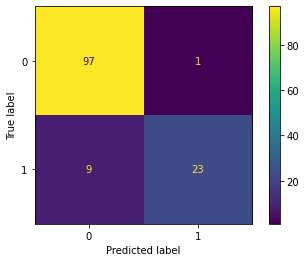

In [23]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scaled, y_test);

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [ ]:
# call_on_students(1)

In [26]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Accuracy
accuracy_score(y_test, logreg.predict(X_test_scaled))

# how often we labeled something correctly

0.9230769230769231

In [28]:
# Precision
precision_score(y_test, logreg.predict(X_test_scaled))

# When we predict class 1, what is the probability that it is 
# actually class 1

0.9583333333333334

In [29]:
# Recall
recall_score(y_test, logreg.predict(X_test_scaled))

# When the true value is class 1, what is the probability that
# we predicted class 1

0.71875

In [30]:
# F1-Score
f1_score(y_test, logreg.predict(X_test_scaled))

# takes into account precision and recall

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In this lesson, we investigated another evaluation metric for classification algorithms (including logistic regression). Namely, the Receiver Operating Characteristic curve (ROC) which graphs the False Positive Rate against the True Positive Rate. The overall accuracy of a classifier can thus be quantified by the AUC, the Area Under the Curve. Perfect classifiers would have an AUC score of 1.0 while an AUC of 0.5 is deemed trivial or worthless. Next, you're going to get more practice graphing the ROC and AUC curves and making interpretations based on them.

In [31]:
# call_on_students(1)
from sklearn.metrics import roc_curve, auc

In [32]:
# Calculate roc-auc
y_score = logreg.fit(X_train_scaled, y_train).decision_function(X_test_scaled)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.9811862244897959


In [47]:
test_probs = logreg.predict_proba(X_test_scaled)
pos_probs = test_probs[:, 1]

In [48]:
roc_auc_score(y_test, pos_probs)

0.9811862244897959

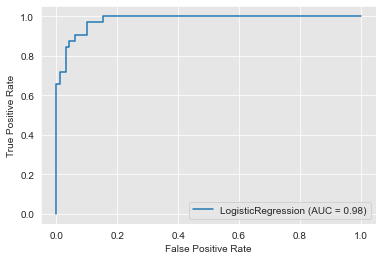

In [50]:
plot_roc_curve(logreg, X_test_scaled, y_test);

AUC: 0.9811862244897959


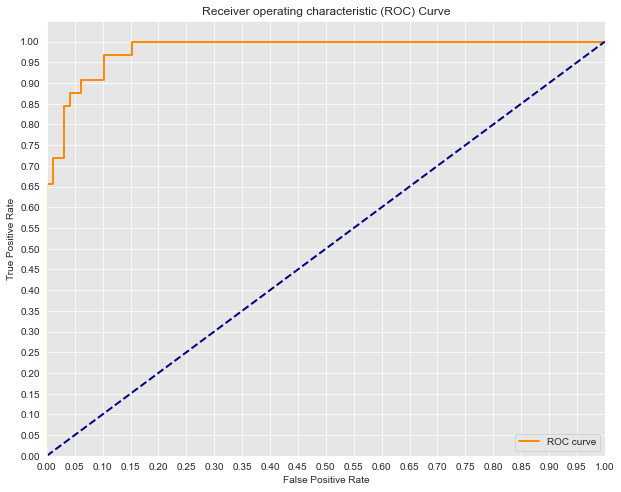

In [33]:
# Plot the ROC curve
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [ ]:
# call_on_students(1)

#### Answer:

- AUC close to 1 (doing good) Acc and precision are very high, recall is somewhat lower. Our model is more prone to making false engative predictions.


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [39]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

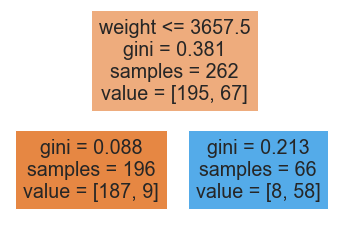

In [40]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

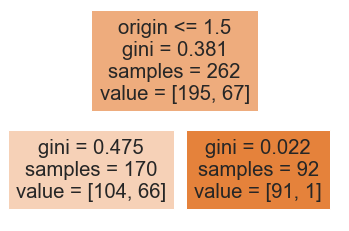

In [41]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Version 1 has more pure leaf nodes (more separated) Able to seperate classes better, more pure nodes)


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [67]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

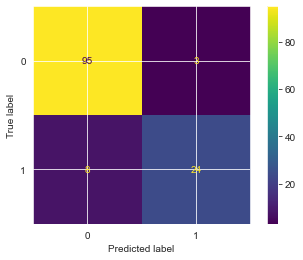

In [68]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test_scaled, y_test);

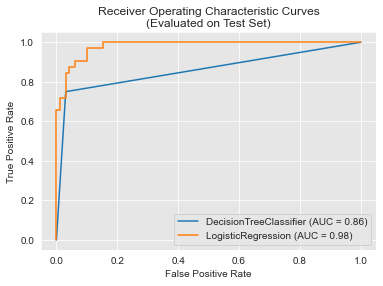

In [69]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Decision Tree because it has an AUC of 1, but its deff overfitting
